In [ ]:
# import packages and load dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Conv2DTranspose, UpSampling2D, MaxPool2D, Dropout, GaussianNoise, Flatten, Input, Reshape
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

dataset = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = dataset

In [ ]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

In [ ]:
x_train_small = x_train[:5000]
y_train_small = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


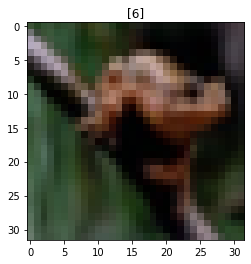

In [ ]:
def plot_img(img, label):
    plt.title(label)
    plt.imshow(img)
    plt.show()

plot_img(x_train[0], y_train[0])

In [ ]:
tf.keras.backend.clear_session()
classifier = Sequential([
    Conv2D(16, 3, activation="relu", padding="same", input_shape=[32, 32, 3]),
    MaxPool2D(),
    Conv2D(8, 3, activation="relu", padding="same"),
    MaxPool2D(),
    Conv2D(8, 3, activation="relu", padding="same"),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="sigmoid")
])

classifier.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
clf_history = classifier.fit(
    x_train, tf.keras.utils.to_categorical(y_train),
    epochs=30, batch_size=128,
    validation_data=(x_test, tf.keras.utils.to_categorical(y_test))
)

Epoch 1/30
352/352 [==============================] - 2s 5ms/step - loss: 1.9460 - accuracy: 0.2853 - val_loss: 1.4776 - val_accuracy: 0.4707
Epoch 2/30
352/352 [==============================] - 2s 4ms/step - loss: 1.4449 - accuracy: 0.4787 - val_loss: 1.3652 - val_accuracy: 0.5024
Epoch 3/30
352/352 [==============================] - 2s 4ms/step - loss: 1.3327 - accuracy: 0.5246 - val_loss: 1.2934 - val_accuracy: 0.5402
Epoch 4/30
352/352 [==============================] - 2s 5ms/step - loss: 1.2696 - accuracy: 0.5462 - val_loss: 1.2345 - val_accuracy: 0.5572
Epoch 5/30
352/352 [==============================] - 2s 5ms/step - loss: 1.2122 - accuracy: 0.5690 - val_loss: 1.2124 - val_accuracy: 0.5669
Epoch 6/30
352/352 [==============================] - 2s 5ms/step - loss: 1.1733 - accuracy: 0.5841 - val_loss: 1.1764 - val_accuracy: 0.5811
Epoch 7/30
352/352 [==============================] - 2s 5ms/step - loss: 1.1463 - accuracy: 0.5946 - val_loss: 1.1366 - val_accuracy: 0.5956
Epoch 

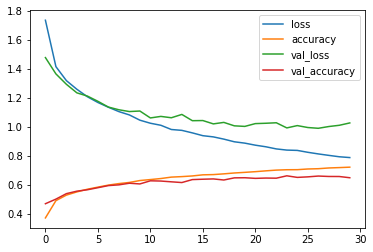

In [ ]:
import pandas as pd
pd.DataFrame(clf_history.history).plot()
plt.show()

In [ ]:


encoder = Sequential([
    Conv2D(8, 3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    MaxPool2D(),
    Conv2D(8, 3, padding="same", activation="relu"),
    MaxPool2D(),
    Conv2D(8, 3, padding="same", activation="relu"),
    MaxPool2D(),
    Flatten(), # output shape is [batch_size, 4*4*8]
])

decoder = Sequential([
    Input(shape=[4*4*8]),
    Reshape((4, 4, 8)),
    UpSampling2D(),
    Conv2DTranspose(8, 3, padding="same", activation="relu"),
    UpSampling2D(),
    Conv2DTranspose(8, 3, padding="same", activation="relu"),
    UpSampling2D(),
    Conv2DTranspose(3, 3, padding="same", activation="sigmoid"),
])

auto_encoder = Sequential([
    encoder,
    decoder
])

auto_encoder.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
auto_encoder.build(input_shape=[None, 32, 32, 3])
auto_encoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 128)               1392      
_________________________________________________________________
sequential_2 (Sequential)    (None, 32, 32, 3)         1387      
Total params: 2,779
Trainable params: 2,779
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
1407/1407 [==============================] - 8s 5ms/step - loss: 0.6146 - accuracy: 0.4219 - val_loss: 0.5866 - val_accuracy: 0.6107
Epoch 2/15
1407/1407 [==============================] - 6s 5ms/step - loss: 0.5848 - accuracy: 0.6214 - val_loss: 0.5831 - val_accuracy: 0.6352
Epoch 3/15
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5822 - accuracy: 0.6318 - val_loss: 0.5818 - val_accuracy: 0.6141
Epoch 4/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5808 - accuracy: 0.6379 - val_loss: 0.5805 - val_accuracy: 0.6445
Epoch 5/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5800 - accuracy: 0.6370 - val_loss: 0.5798 - val_accuracy: 0.6422
Epoch 6/15
1407/1407 [==============================] - 6s 5ms/step - loss: 0.5784 - accuracy: 0.6393 - val_loss: 0.5792 - val_accuracy: 0.6395
Epoch 7/15
1407/1407 [==============================] - 6s 5ms/step - loss: 0.5780 - accuracy: 0.6432 - val_loss: 0.5788 - val_accuracy:

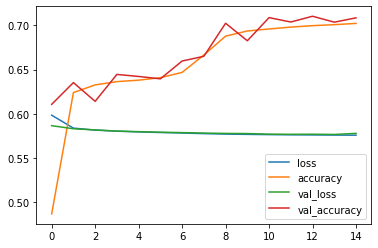

In [ ]:
history = auto_encoder.fit(x_train, x_train, epochs=15, batch_size=32, validation_data=(x_test, x_test))
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
pretrained_classifier = Sequential([
    encoder,
    Dense(64, activation="relu"),
    Dense(10, activation="sigmoid")
])

encoder.trainable = False

pretrained_classifier.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
pretrained_classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 128)               1392      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 10,298
Trainable params: 8,906
Non-trainable params: 1,392
_________________________________________________________________


Epoch 1/15
40/40 [==============================] - 1s 14ms/step - loss: 2.3426 - accuracy: 0.1240 - val_loss: 2.2135 - val_accuracy: 0.2059
Epoch 2/15
40/40 [==============================] - 0s 9ms/step - loss: 2.1914 - accuracy: 0.2081 - val_loss: 2.1464 - val_accuracy: 0.2438
Epoch 3/15
40/40 [==============================] - 0s 9ms/step - loss: 2.1208 - accuracy: 0.2438 - val_loss: 2.0900 - val_accuracy: 0.2484
Epoch 4/15
40/40 [==============================] - 0s 9ms/step - loss: 2.0795 - accuracy: 0.2460 - val_loss: 2.0506 - val_accuracy: 0.2669
Epoch 5/15
40/40 [==============================] - 0s 9ms/step - loss: 2.0308 - accuracy: 0.3032 - val_loss: 2.0197 - val_accuracy: 0.2782
Epoch 6/15
40/40 [==============================] - 0s 10ms/step - loss: 1.9919 - accuracy: 0.2908 - val_loss: 1.9917 - val_accuracy: 0.2919
Epoch 7/15
40/40 [==============================] - 0s 10ms/step - loss: 1.9777 - accuracy: 0.2961 - val_loss: 1.9777 - val_accuracy: 0.2967
Epoch 8/15
40/40 

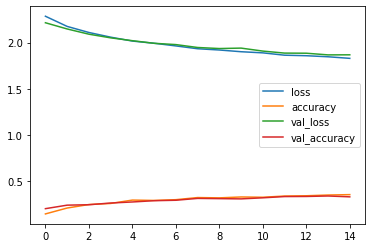

In [ ]:
pre_history = pretrained_classifier.fit(
    x_train_small,
    tf.keras.utils.to_categorical(y_train_small),
    epochs=15, batch_size=128,
    validation_data=(x_test, tf.keras.utils.to_categorical(y_test))
)
pd.DataFrame(pre_history.history).plot()
plt.show()

Epoch 1/30
40/40 [==============================] - 1s 19ms/step - loss: 1.8645 - accuracy: 0.3446 - val_loss: 1.8254 - val_accuracy: 0.3531
Epoch 2/30
40/40 [==============================] - 0s 11ms/step - loss: 1.7939 - accuracy: 0.3675 - val_loss: 1.8003 - val_accuracy: 0.3615
Epoch 3/30
40/40 [==============================] - 0s 11ms/step - loss: 1.7557 - accuracy: 0.3853 - val_loss: 1.7856 - val_accuracy: 0.3633
Epoch 4/30
40/40 [==============================] - 0s 11ms/step - loss: 1.7170 - accuracy: 0.3854 - val_loss: 1.7924 - val_accuracy: 0.3640
Epoch 5/30
40/40 [==============================] - 0s 11ms/step - loss: 1.6750 - accuracy: 0.4031 - val_loss: 1.7258 - val_accuracy: 0.3822
Epoch 6/30
40/40 [==============================] - 0s 11ms/step - loss: 1.6781 - accuracy: 0.4018 - val_loss: 1.6842 - val_accuracy: 0.4003
Epoch 7/30
40/40 [==============================] - 0s 10ms/step - loss: 1.6164 - accuracy: 0.4245 - val_loss: 1.8050 - val_accuracy: 0.3556
Epoch 8/30
40

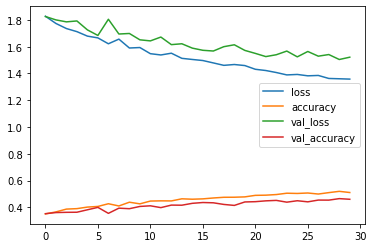

In [ ]:
encoder.trainable = True

pretrained_classifier.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

pre_history = pretrained_classifier.fit(
    x_train_small,
    tf.keras.utils.to_categorical(y_train_small),
    epochs=30, batch_size=128,
    validation_data=(x_test, tf.keras.utils.to_categorical(y_test))
)
pd.DataFrame(pre_history.history).plot()
plt.show()